In [77]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [78]:
# Cost function for collaborative filtering
def coast(x,y,theta,r,lambda_): 
    h=x.dot(theta.T)
    return(1/(2))*np.sum(np.square((h-y)*R))+(lambda_/2)*np.sum(theta**2)+(lambda_/2)*np.sum(x**2)

In [79]:
# Gradient computation for collaborative filtering
def gradeint(x,theta,y,r,lambda_):
    h=x.dot(theta.T) #
    gradeintx = ((h-y)*r).dot(theta) + lambda_*x
    gradeinttheta = ((h-y)*r).T.dot(x) + lambda_*theta
    return gradeintx,gradeinttheta

In [80]:
# Training function for collaborative filtering
def train(num_iterations,alpha,lambda_,r,theta,x,y):
    cost_history = np.zeros((num_iterations, 1))
    for i in range(num_iterations):
        x=x-(alpha)*gradeint(x,theta,y,r,lambda_)[0]
        theta=theta-(alpha)*gradeint(x,theta,y,r,lambda_)[1]
        cost_history[i,0]=coast(x,y,theta,r,lambda_)
    return cost_history,cost_history[-1],theta,x

In [81]:
# Function to normalize user ratings

def normalizeRatings(Y, R):
    m, n = Y.shape
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros_like(Y)

    for i in range(m):
        idx = np.where(R[i, :] == 1)[0]
        Ymean[i] = np.mean(Y[i, idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]

    return Ynorm, Ymean




In [82]:
# Initialize weights randomly
def randInitializeWeights(input_size, output_size):
    epsilon_init = 0.12  # You can adjust this value based on your preference
    return np.random.rand(output_size, input_size + 1) * 2 * epsilon_init - epsilon_init

In [83]:
# Make movie recommendations
def prediction(thetap,indica):
    t=tthetaf[indica,:].reshape((-1,1))
    p=fx.dot(t)
    p=p+Ymean
    return p

In [84]:

# Load movie list
def load_movie_list(filename):
    with open(filename, 'r') as file:
        movie_list = [line.strip() for line in file]
    return movie_list

In [85]:
# Load data from a .mat file
data= scipy.io.loadmat('ex8_movies.mat')

In [86]:

Y=data['Y']

In [87]:

R=data['R']

In [88]:
# Example user ratings
my_ratings =np.zeros((1682,1))

In [89]:

my_ratings[0]= 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354]= 5


In [90]:
# Create a binary matrix indicating which movies were rated
myR=(my_ratings>0).astype(int)

In [91]:

my_ratings.shape

(1682, 1)

In [92]:
# Extend the user ratings and binary matrix
Y=np.column_stack((Y,my_ratings))

In [93]:

R=np.column_stack((R,myR))

In [94]:
# Normalize user ratings
Ynorm, Ymean = normalizeRatings(Y, R)
# Set up variables
num_users = Y.shape[1]
num_movies =Y.shape[0]
num_features = 10

In [95]:

X = randInitializeWeights(num_features,num_movies)
Theta = randInitializeWeights(num_features,num_users,)

In [96]:
# Train the collaborative filtering model
train(1000,.01,10,R,Theta,X,Ynorm)
cost_history,cost_history[-1],tthetaf,fx=train(1000,.01,10,R,Theta,X,Ynorm)

print(cost_history[-1])

[38710.48373045]


In [97]:

iteration_history = np.arange(1000).reshape(-1, 1)

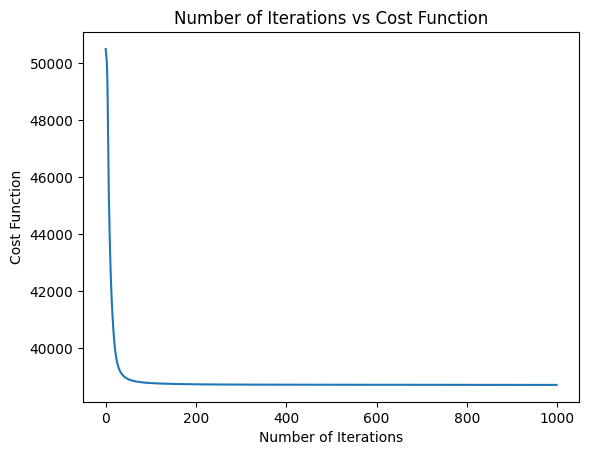

In [98]:

plt.figure()
plt.plot(iteration_history, cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')
plt.title('Number of Iterations vs Cost Function')
plt.show()

In [99]:
# Make movie recommendations
p=prediction(tthetaf,943)

In [100]:

# Specify the filename for your movie list
movie_list_filename = 'movie_ids.txt'  # Replace with the actual filename

# Load the movie list
movieList = load_movie_list(movie_list_filename)

sorted_predictions = p.flatten().tolist()

# Sort the indices based on the sorted predictions
sorted_indices = np.argsort(p.flatten())[::-1]

print("\nTop recommendations for you:")
for i in range(10):
    j = sorted_indices[i]
    rating = "{:.1f}".format(sorted_predictions[i])
    print("Predicting rating {} for movie {}".format(rating, movieList[j]))

print("\n\nOriginal ratings provided:")
for i, rating in enumerate(my_ratings, start=1):
    if rating > 0:
        print("Rated {} for {}".format(rating, movieList[i - 1]))






Top recommendations for you:
Predicting rating 4.0 for movie 1201 Marlene Dietrich: Shadow and Light (1996)
Predicting rating 3.3 for movie 1500 Santa with Muscles (1996)
Predicting rating 3.3 for movie 1599 Someone Else's America (1995)
Predicting rating 3.6 for movie 1122 They Made Me a Criminal (1939)
Predicting rating 3.4 for movie 1653 Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 3.6 for movie 1293 Star Kid (1997)
Predicting rating 3.8 for movie 814 Great Day in Harlem, A (1994)
Predicting rating 3.9 for movie 1536 Aiqing wansui (1994)
Predicting rating 3.8 for movie 1189 Prefontaine (1997)
Predicting rating 3.8 for movie 1467 Saint of Fort Washington, The (1993)


Original ratings provided:
Rated [4.] for 1 Toy Story (1995)
Rated [3.] for 7 Twelve Monkeys (1995)
Rated [5.] for 12 Usual Suspects, The (1995)
Rated [4.] for 54 Outbreak (1995)
Rated [5.] for 64 Shawshank Redemption, The (1994)
Rated [3.] for 66 While You Were Sleeping (1995)
Rated [5.] for 69 